In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from matplotlib import pyplot as plt
import tensorflow as tf
import joblib as jl
import pandas as pd
import numpy as np
import cv2
import os

print(f'numpy version : {np.__version__}')
print(f'pandas version : {pd.__version__}')
print(f'tensorflow version : {tf.__version__}')

numpy version : 1.18.5
pandas version : 1.1.4
tensorflow version : 2.3.1


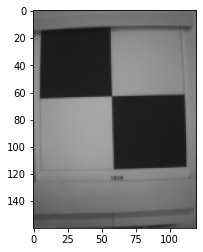

In [2]:
path_test_images = '../ML/data_set_final/train/0110/0110_1_672372.bmp'
img = image.load_img(path_test_images)
plt.imshow(img)

In [3]:
path_test_images = cv2.imread(path_test_images)
path_test_images.shape

(160, 120, 3)

In [4]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)
train_dataset = train.flow_from_directory('../ML/data_set_final/train/', 
                                          target_size=(160, 120),
                                          batch_size=3)
validation_dataset = validation.flow_from_directory('../ML/data_set_final/validation/', 
                                            target_size=(160, 120),
                                            batch_size=3)

Found 864 images belonging to 16 classes.
Found 197 images belonging to 16 classes.


In [5]:
train_dataset.class_indices

{'0000': 0,
 '0001': 1,
 '0010': 2,
 '0011': 3,
 '0100': 4,
 '0101': 5,
 '0110': 6,
 '0111': 7,
 '1000': 8,
 '1001': 9,
 '1010': 10,
 '1011': 11,
 '1100': 12,
 '1101': 13,
 '1110': 14,
 '1111': 15}

In [6]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape = (160, 120, 3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape = (160, 120, 3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dropout(0.15),
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    tf.keras.layers.Dense(16,activation='softmax')
                                   ])


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 158, 118, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 79, 59, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 77, 57, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 38, 28, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 36, 26, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 13, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 14976)             0

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
model.fit(train_dataset,
          steps_per_epoch=3,
          epochs=25,
          validation_data=validation_dataset)


Epoch 1/25
3/3 [==============================] - 1s 220ms/step - loss: 2.9024 - accuracy: 0.0000e+00 - val_loss: 2.7336 - val_accuracy: 0.0964
Epoch 2/25
3/3 [==============================] - 1s 180ms/step - loss: 2.8694 - accuracy: 0.0000e+00 - val_loss: 2.7268 - val_accuracy: 0.2538
Epoch 3/25
3/3 [==============================] - 1s 182ms/step - loss: 2.7358 - accuracy: 0.4444 - val_loss: 2.7367 - val_accuracy: 0.2386
Epoch 4/25
3/3 [==============================] - 1s 186ms/step - loss: 2.7799 - accuracy: 0.1111 - val_loss: 2.7383 - val_accuracy: 0.0609
Epoch 5/25
3/3 [==============================] - 1s 189ms/step - loss: 2.6804 - accuracy: 0.2222 - val_loss: 2.7077 - val_accuracy: 0.1320
Epoch 6/25
3/3 [==============================] - 1s 194ms/step - loss: 2.6916 - accuracy: 0.1111 - val_loss: 2.6549 - val_accuracy: 0.1523
Epoch 7/25
3/3 [==============================] - 1s 194ms/step - loss: 2.6416 - accuracy: 0.1111 - val_loss: 2.5566 - val_accuracy: 0.2741
Epoch 8/25
3

In [10]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,2.902442,0.000000,2.733554,0.096447
1,2.869395,0.000000,2.726813,0.253807
2,2.735818,0.444444,2.736723,0.238579
3,2.779916,0.111111,2.738267,0.060914
4,2.680446,0.222222,2.707731,0.131980
5,2.691575,0.111111,2.654871,0.152284
6,2.641606,0.111111,2.556567,0.274112
7,2.543345,0.444444,2.405653,0.360406
8,2.356079,0.444444,2.203798,0.380711
9,2.701633,0.111111,2.047400,0.472081


In [11]:
model.save('model_datacom_final')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model_datacom_final/assets


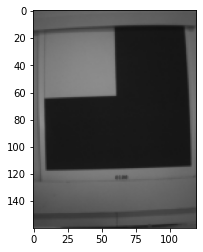

In [12]:
test_path = '../ML/data_set_final/train/1000/1000_1_634983.bmp'
test_img = image.load_img(test_path)
plt.imshow(test_img)

In [13]:
array_test_img = image.img_to_array(test_img)
array_test_img = np.expand_dims(array_test_img,axis=0)
target = np.vstack([array_test_img])
val = model.predict(target)
print(val[0])

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [14]:
np.argmax(model.predict(target), axis=-1)

array([8])

In [15]:
model.evaluate(validation_dataset)

66/66 [==============================] - 0s 7ms/step - loss: 0.2499 - accuracy: 0.9137


[0.24992534518241882, 0.913705587387085]